<h1 style="background-color:#f5c0c0;"> Cars Data Analysis </h1>

<div class="row">
  <div class="column">
      <img  src='https://ocean.si.edu/sites/default/files/styles/article_full_width/public/chameleon_mclaren.jpg?itok=PCU4VPg-' alt="Hope" style="width:100%" height="200" width="200">
  </div>
  <div class="column">
    <img src="https://imgcdnblog.carmudi.com.ph/carmudi-ph/wp-content/uploads/2017/05/17060108/onlineimageresize_com_1967alfaromeotipo33stradale8.jpg" alt="For" height="200" width="200" style="width:100%">
  </div>
  <div class="column">
    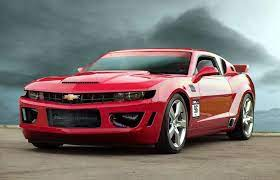
  </div>
</div>

<h1 style="background-color:powderblue;"> Importing Packages</h1>

In [ ]:
# Package for tackling with math problems and datasets
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Packages for change in markdown 
from IPython.display import HTML
from colorama import Fore as f

# Packages to preprocess the data
import re

# Packages for removing some unwanted outputs("warnings")
import warnings
warnings.filterwarnings("ignore")

# Making a script to change the css and some of the formats in th
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 15%;
	color: #355681;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 0.4), 
		inset 0 0 5px rgba(53,86,129, 0.5),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 10px;
	background: #fff ;
    
}
/* Three image containers (use 25% for four, and 50% for two, etc) */
.column {
  float: left;
  width: 33.33%;
  padding: 5px;
}

/* Clear floats after image containers */
.row::after {
  content: "";
  clear: both;
  display: table;
}

</style>""")

<h1 style="background-color:powderblue;"> Why do we need this analysis on cars ? </h1>

### Well when you go on to buy a car what do you look for ?<br>1. Well is this company well known ?<br>2. Does the car have good reviews ? <br>3. What mileage does it give ?<br>4. What is it's cost ? etc. <br>Exactly so many questions are there !! <br>I will try to solve some of these questions using this awesome dataset<br>Add your questions in the comment section will try to explore that as well :)

<h1 style="background-color:powderblue;"> Importing the dataset </h1>

In [ ]:
# Making a function to remove the characters and only leave the numbers
def remove_characters(tex):
    if tex==' - ':
        return -1
    elif '-' in tex :
        return float(tex.split('-')[0])
    else:
        return float(re.sub(r'[^0-9.]','',tex))

# Making a function to convert price
def price_changer(tex):
    if 'lakh' in tex.lower() :
        num=remove_characters(tex)
        num*=100000
    elif 'crore' in tex.lower():
        num=remove_characters(tex)
        num*=10000000
    return num

# Importing the all cars dataset
cars=pd.read_csv("../input/all-cars-in-india-price-and-specifications/All_cars_dataset.csv")

# Dropping the Top_Speed column and the other null values
cars.drop('Top_Speed',axis=1,inplace=True)
cars.dropna(inplace=True)

# Preprocess the data
cars['Company']=cars['Name'].apply(lambda x : x.split(' ')[0])
cars['EMI']=cars['EMI'].apply(lambda x: int(x.replace(',','')))
cars['Mileage']=cars['Mileage'].apply(remove_characters)
cars['Price']=cars['Price'].apply(price_changer)

# Since Manual cars are cheaper and we are taking the price for the cheaper model we will consider
# that the cars we are picking from Manual/Automatic in Transmission are Manual
cars['TRANSMISSION'].replace({'Automatic, Manual ':'Manual ','Manual, Automatic ':'Manual ',
                              'Manual, Semi - Automatic, Automatic ':'Manual ',
                             'Manual, Automatic, Semi - Automatic ':'Manual '},inplace=True)


# Having a look at the data
cars.head()

<h1 style="background-color:powderblue;"> Which Company Is The Best ? </h1>

### Well there are different ways we can look at the problem . <br>There might be different categories so we can just look for the mean values , but that's not the only way.<br>Let's look at what every company offers.

In [ ]:
# Making the subplot
fig=make_subplots(rows=2,cols=2,
                specs=[[{"rowspan":2,"colspan":1},{"type":"pie"}],[None,{}]],
                subplot_titles=("Company vs Price","Company Distribution in Dataset ","Company vs Average Emi Price"))

# Getting the grouped data for the plots
group_mean=cars.groupby('Company').mean()
group_mean_price=group_mean.sort_values("Price").iloc[:10]
group_mean_emi=group_mean.sort_values("EMI").iloc[:10]
val_counts_company=cars['Company'].value_counts()
company_dic={i:j for i,j in zip(list(val_counts_company.index),val_counts_company.values)}

# Proportion of the top 10 companies in the bar plot in the dataset
proportion_dic={}
for i in group_mean_price.index :
    proportion_dic[i]=company_dic[i]
proportion_dic["Others"]=len(cars)-sum(proportion_dic.values())

# Adding the trace for the proportion of the companies in the datset
fig.add_trace(go.Pie(values=list(proportion_dic.values()),labels=list(proportion_dic.keys())),row=1,col=2)
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict( line=dict(color='#000000', width=2)))
# Making the figure Company vs Price
# Adding the trace for the bar plot
fig.add_trace(go.Bar(x=group_mean_price.index[:1],y=group_mean_price.Price[:1],marker={'color': "#9dbeb9"}),row=1,col=1)
fig.add_trace(go.Bar(x=group_mean_price.index[1:-1],y=group_mean_price.Price[1:-1],marker={'color': "#ff8882"}),row=1,col=1)
fig.add_trace(go.Bar(x=group_mean_price.index[-1:],y=group_mean_price.Price[-1:],marker={'color': "#194350"}),row=1,col=1)

# Adding the trace for the Line plot
fig.add_trace(go.Line(x=group_mean_emi.index,y=group_mean_emi.EMI),row=2,col=2)
fig.add_trace(go.Bar(x=group_mean_emi.index,y=group_mean_emi.EMI),row=2,col=2)

# Updating the layout of the plot

fig.update_layout(height=700, showlegend=False,template="presentation")

# Showing the plot
fig.show()

### Well from the above plot we can clearly see the that the price of the cars from toyota are pretty high followed by MG .<br>Well we can also see the similar kind of relation in the plot (2,2) where we can see if the price of the car is high there is a high EMI for the cars as well . <br>Which company would you prefer ?

<h1 style="background-color:#ffd3b4;"> Well I have checked the price but what about mileage ?</h1>

### Getting this question in your mind is absolutely right . Well if you buy a new car and it's cheap as compared to others , <br>but it's mileage is pretty bad . I'm pretty sure it will cost you more than the other cars in the near future . <br>The next question you might get is what effects mileage of a car well we can know that from a simple heat map you know?<br>Let's try that

In [ ]:
# Let's make a copy of the original dataframe for now and continue with the further preprocessing
cars2=cars.copy()

# Preprocessing the data and converting the categorical columns to numerical columns
cars['ENGINE']=cars['ENGINE'].apply(remove_characters)
cars['TRANSMISSION']=pd.factorize(cars['TRANSMISSION'])[0]
cars['FUEL TYPE']=pd.factorize(cars['FUEL TYPE'])[0]
cars['Wheelbase (mm)']=pd.factorize(cars['Wheelbase (mm)'])[0]
cars['Displacement (cc)']=pd.factorize(cars['Displacement (cc)'])[0]
cars['Peak Power']=pd.factorize(cars['Peak Power'])[0]
cars['Peak Torque']=pd.factorize(cars['Peak Torque'])[0]

In [ ]:
df=cars[["Mileage","Price","ENGINE","TRANSMISSION","FUEL TYPE","Wheelbase (mm)","Displacement (cc)","Peak Power","Peak Torque"]]
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.mask(mask)
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='fall',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(title_text='Correlation Matrix (continuous features)',
                  title_x=0.5,
                  titlefont={'size': 20},
                  width=600, height=600,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  template="simple_white"
                  )
fig.show()

### Well here we can see the features that are correlated with the mileage feature . <br>Price is negatively correlated with the mileage of the cars which shows that if the price of the car is high there is also a possibility of the car having low mileage . <br>Highest correlation was also seen in price follwed by transmission which shows the relation between the automation of the cars and the mileage offered by the carWe also have some of the terms like peak power and peak torque which also have impact on the mileage of the cars. 

<h1 style="background-color:#ffd3b4;"> What is Displacement , Peak Power and Peak Torque ?</h1>

<div class="row">
  <div class="column">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFrJqHKK6Ti8unKgxZjDGOziYCLRy5xp8AEQ&usqp=CAU" alt="Snow" style="width:100%" height="200" width="200">
  </div>
  <div class="column">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQVmqsLjZUgmGDKl879DqthRbybeP6mhLq36g&usqp=CAU" alt="Forest" style="width:100%" height="200" width="200">
  </div>
  <div class="column">
    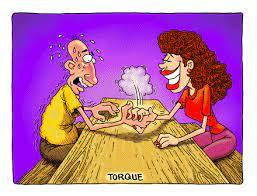
  </div>
</div>

### Well don't misunderstand it means nothing like the above pictures hehe , <br><br>**Displacement** : Engine displacement is the **measure of the cylinder volume swept by all of the pistons of a piston engine, excluding the combustion chambers**. It's measures in cubic centimeters , hence also named as cc . <br> <br>**Peak Power**  : peak power is simply the absolute highest amount of power the amplifier or speaker can handle before failing. Max power is the highest amount of power that can be safely sustained. **RMS** is continuous power handling at sustained listening level.<br> <br>**Peak Torque** : cars need more force - or torque - to get them moving. Torque is defined as the engines **rotational force**. You may notice that torque - like horsepower - is always expressed at a certain engine speed. For example, a Ford Fiesta Ecoboost develops peak torque between 1,400rpm and 4,000rpm. 

<h1 style="background-color:#dbf6e9;"> Let's have a look at some vizz :)</h1>

In [ ]:
# Preprocessing data for the plot
df.sort_values("Price",ascending=False,inplace=True)

# Putting the threshold for the mileage to be 12
df_above_12=df[df['Mileage']>12]
automatic_count=df_above_12['TRANSMISSION'].value_counts()[0]
manual_count=df_above_12['TRANSMISSION'].value_counts()[1]

# Making the subplot
fig2=make_subplots(rows=2,cols=3,
                specs=[[{"rowspan":2,"colspan":2,"type":'scatter'},None,{"type":"indicator"}],[None,None,{'type':'indicator'}]],
                subplot_titles=("Price vs Mileage",))

# Adding the scatter plot
fig2.add_trace(go.Scatter(x=df["Price"].values,y=df["Mileage"].values,mode='markers',
                          marker=dict(size=df['ENGINE'].values/1000000,
                                     color=df['TRANSMISSION'])),row=1,col=1)

# Adding the Indicator/Gauge plot for automatic Transmission
fig2.add_trace(go.Indicator( domain = {'x': [0, 1], 'y': [0, 1]},
    value = automatic_count,
    mode = "gauge+number",
    title = {'text': "Above 12 Mileage Automatic Tranmission Cars","font":{"size":14}},
    gauge = {'axis': {'range': [None, len(df_above_12)]},
            'steps': [{'range':[0,automatic_count],'color':'cyan'}]}),row=1,col=3)

# Adding the Indicator/Gauge plot for the Manual Transmission
fig2.add_trace(go.Indicator( domain = {'x': [0, 1], 'y': [0, 1]},
    value = manual_count,
    mode = "gauge+number+delta",
    title = {'text': "Above 12 Mileage Manual Tranmission Cars","font":{"size":14}},
    delta = {'reference':automatic_count},
    gauge = {'axis': {'range': [None, len(df_above_12)]},
            'steps': [
                {'range': [0, manual_count], 'color': 'cyan'},
                {'range': [manual_count,automatic_count ], 'color': 'white'}],
            'threshold': {
                'line': {'color': "red", 'width': 4},
                'thickness': 0.75,
                'value': automatic_count} 
            
            }),row=2,col=3)

fig2.update_layout(template='simple_white')
fig2.show()

In [ ]:
print(f.YELLOW,"Manual Transmission Count in Actual Data Percentage : ",f.CYAN,df['TRANSMISSION'].value_counts()[1]*100/len(df),f.YELLOW,' %')
print("Automatic Transmission Count in Actual Data Percentage : ",f.CYAN,df['TRANSMISSION'].value_counts()[0]*100/len(df),f.YELLOW,' %')
print("Manual Transmission Count in Data for cars with more than 12 mileage",f.CYAN,manual_count*100/len(df_above_12),f.YELLOW,' %')
print("Automatic Transmission Count in Data for cars with more than 12 mileage",f.CYAN,automatic_count*100/len(df_above_12),f.YELLOW,' %')

### Well from the above plots we can clearly see that as the price of the cars inversly effects the mileage of the cars we can see clearly that most of the cars with the highest mileage has a lower price as compared to the ones with the low mileage.<br>
### We also try to compare the number of the cars with mileage more than 12 with their previous data percentage and see the sudden hike in the number which shows that the percentage of manual cars data in the cars with higher mileage than 12 is more than the actual percentage of the whole data which shows that if the car is manual there is a higher chance for it to have higher mileage . <br>

<h1 style="background-color:#dbf6e9;">Well we worked with mileage and Price but is that it? Umm would it work if your car has 2 seats and you are buying for family of 5 </h1>

In [ ]:
# Making a copy of the cars data
car=cars.copy()
car['Price/Mileage']=car['Price']/car['Mileage']
car["Seating Capacity"]=car["Seating Capacity"].apply(remove_characters)
car=car[car['Seating Capacity']>0]
grouped_company=car.groupby('Company').mean()
grouped_company.sort_values('Price/Mileage',ascending=False,inplace=True)

# Making the function by the name rg which means return_grouped data
def rg(number_of_seats=2,all_=False) :
    car=cars.copy()
    car['Price/Mileage']=car['Price']/car['Mileage']
    car["Seating Capacity"]=car["Seating Capacity"].apply(remove_characters)
    if all_ :
        car=car[car['Seating Capacity']>0]
        grouped_company=car.groupby('Company').mean()
        grouped_company.sort_values('Price/Mileage',ascending=False,inplace=True)
        return grouped_company.index,grouped_company['Price/Mileage'].values
    else:
        car=car[car['Seating Capacity']==number_of_seats]
        grouped_company=car.groupby('Company').mean()
        grouped_company.sort_values('Price/Mileage',ascending=False,inplace=True)
        return grouped_company.index,grouped_company['Price/Mileage'].values 

# Making a function to return a dataframe with specific columns for a specific company
def rd(company,all_=False):
    if all_ :
        comp=cars[["Name","EMI","Mileage","Price","ENGINE"]]
    else:
        comp=cars2[cars2["Company"]==company][["Name","EMI","Mileage","Price","ENGINE"]]
    comp.sort_values("Mileage",ascending=False,inplace=True)
    comp=comp.iloc[:5]
    l=[]
    for i in comp.columns:
        l.append(list(comp[i].values))
    return list(comp.columns),l

# Making a function to return the visibility
def visi(num):
    vis=[False]*18
    vis[num]=True
    vis[num+6]=True
    vis[num+12]=True
    return vis

# Making the subplot
fig3=make_subplots(rows=4,cols=4,
                  specs=[[{'rowspan':4,'colspan':2,'type':"bar"},None,{'colspan':2,"rowspan":2,'type':"table"},None],
                         [None,None,None,None],[None,None,{'colspan':2,"rowspan":2,'type':'table'},None],
                        [None,None,None,None]],
                   subplot_titles=("Price - Mileage Ratio","Best Recommendation","Second Best Recommendation"))

# Adding the barplot
fig3.add_trace(go.Bar(x=grouped_company.index,y=grouped_company['Price/Mileage'],marker={'color': "#ff8882"},
                     visible=True,name="All Data"),row=1,col=1)
fig3.add_trace(go.Bar(x=rg(2)[0],y=rg(2)[1],marker={'color': "#ff8882"},
                     visible=False,name="All Data"),row=1,col=1)
fig3.add_trace(go.Bar(x=rg(4)[0],y=rg(4)[1],marker={'color': "#ff8882"},
                     visible=False,name="All Data"),row=1,col=1)
fig3.add_trace(go.Bar(x=rg(5)[0],y=rg(5)[1],marker={'color': "#ff8882"},
                     visible=False,name="All Data"),row=1,col=1)
fig3.add_trace(go.Bar(x=rg(6)[0],y=rg(6)[1],marker={'color': "#ff8882"},
                     visible=False,name="All Data"),row=1,col=1)
fig3.add_trace(go.Bar(x=rg(7)[0],y=rg(7)[1],marker={'color': "#ff8882"},
                     visible=False,name="All Data"),row=1,col=1)

# Adding the first tabular data
tp=[2,4,5,6,7]
fig3.add_trace(go.Table(
    header=dict(values=rd('x',all_=True)[0],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=rd('x',all_=True)[1],
               fill_color='lavender',
               align='left'),visible=True),row=1,col=3)
for i in tp :
    fig3.add_trace(go.Table(
    header=dict(values=rd(rg(i)[0][-1])[0],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=rd(rg(i)[0][-1])[1],
               fill_color='lavender',
               align='left'),visible=False),row=1,col=3)

# Adding the second table
fig3.add_trace(go.Table(
    header=dict(values=rd('x',all_=True)[0],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=rd('x',all_=True)[1],
               fill_color='lavender',
               align='left'),visible=True),row=3,col=3)
for i in tp :
    fig3.add_trace(go.Table(
    header=dict(values=rd(rg(i)[0][-2])[0],
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=rd(rg(i)[0][-2])[1],
               fill_color='lavender',
               align='left'),visible=False),row=3,col=3)


# Add dropdown
fig3.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=[{"visible":visi(0)}],
                    label="All Data",
                    method="restyle"
                ),
                dict(
                    args=[{"visible":visi(1)}],
                    label="2 Seats",
                    method="restyle"
                )
                ,
                dict(
                    args=[{"visible":visi(2)}],
                    label="4 Seats",
                    method="restyle"
                )
            ]),
            pad={"r": 3, "t": 3},
            showactive=True,
            x=0.115,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
        dict(
            type = "buttons",
            direction = "left",
            buttons=list([
                dict(
                    args=[{"visible":visi(3)}],
                    label="5 Seats ",
                    method="restyle"
                ),
                dict(
                    args=[{"visible":visi(4)}],
                    label="6 Seats",
                    method="restyle"
                ),
                dict(
                    args=[{"visible":visi(5)}],
                    label="7 Seats",
                    method="restyle"
                )
            ]),
            pad={"r": 3, "t": 3},
            showactive=True,
            x=0.115,
            xanchor="left",
            y=1,
            yanchor="top"
        )
    ]
)

# Add annotation
fig3.update_layout(
    annotations=[
        dict(text="Number of seats:", showarrow=False,
                             x=0, y=1.08, yref="paper", align="left")
    ]
)


# Updating the layout
fig3.update_layout(template="simple_white")

# Showing the plot
fig3.show()

### The above plot(1.1) shows the companies vs their price/mileage plot which shows the price of the car per mileage which means that if the value is small the company provides you with a car with high mileage at low price .<br><br>Every plot has 2 tables beside it showing you the tabular data for the top 2 companies data <br> <br>This is an interactive plot showing other options for different seats as well :)

#### I took reference from plotly's official site as well as amazing notebook on plotly by [Mr Des](https://www.kaggle.com/desalegngeb/plotly-guide-customize-for-better-visualizations/) If you liked my file please do give Mr des his fair share of appreciation as well :)

![](https://i.pinimg.com/474x/c2/4f/c2/c24fc21a2ba2f9e8847616ae0424788f.jpg)